In [1]:
# Working on the same concept with videos as input
# Import the necessary FER() packages for Video Processing

In [2]:
!pip install FER


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 812 kB 3.9 MB/s 
     |████████████████████████████████| 2.3 MB 43.6 MB/s 


In [3]:
from fer import Video
from fer import FER
import os
import sys
import pandas as pd
# Put in the location of the video file that has to be processed
location_videofile = "/content/drive/MyDrive/Colab Notebooks/Practice set 2 DLNLP/Video_One.mp4"

In [4]:
# But the Face detection detector
face_detector = FER(mtcnn=True)
# Input the video for processing
input_video = Video(location_videofile)

In [5]:
# The Analyze() function will run analysis on every frame of the input video. 
# It will create a rectangular box around every image and show the emotion values next to that.
# Finally, the method will publish a new video that will have a box around the face of the human with live emotion values.
processing_data = input_video.analyze(face_detector, display=False)

INFO:fer:30.00 fps, 583 frames, 19.43 seconds
INFO:fer:Making directories at output
100%|██████████| 583/583 [15:37<00:00,  1.61s/frames]
INFO:fer:Completed analysis: saved to output/Video_One_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 8%
INFO:fer:Compressing: 17%
INFO:fer:Compressing: 25%
INFO:fer:Compressing: 34%
INFO:fer:Compressing: 42%
INFO:fer:Compressing: 51%
INFO:fer:Compressing: 60%
INFO:fer:Compressing: 68%
INFO:fer:Compressing: 77%
INFO:fer:Compressing: 85%
INFO:fer:Compressing: 94%
INFO:fer:Zip has finished


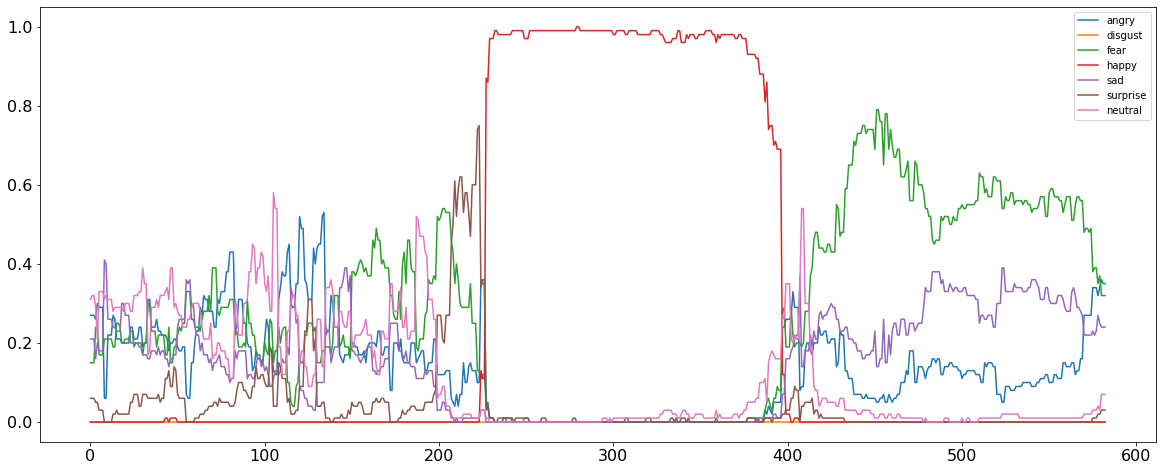

In [6]:
# We will now convert the analysed information into a dataframe.
# This will help us import the data as a .CSV file to perform analysis over it later
vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)

# Plotting the emotions against time in the video
pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()

In [7]:
# We will now work on the dataframe to extract which emotion was prominent in the video
angry = sum(vid_df.angry)
disgust = sum(vid_df.disgust)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]

score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values
score_comparisons

,Human Emotions,Emotion Value from the Video
0,Angry,78.19
1,Disgust,0.00
2,Fear,160.08
3,Happy,164.48
4,Sad,86.44
5,Surprise,25.91
6,Neutral,66.79
